# Tugas Besar Praktikum Kecerdasan Buatan
# Kelompok 14
# Nuraisah 2106080
# Fajar maulana 2106031

# **Machine Learning dengan Regresi Liner**

1. Load Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

2. Load Dataset

In [ ]:
df = pd.read_csv('laptopnur.csv',encoding='latin-1')

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


3. Total Rows dan Column


In [ ]:
df.shape

(499, 13)

4. Melihat Informasi data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         499 non-null    int64  
 1   Company           499 non-null    object 
 2   Product           499 non-null    object 
 3   TypeName          499 non-null    object 
 4   Inches            499 non-null    float64
 5   ScreenResolution  499 non-null    object 
 6   Cpu               499 non-null    object 
 7   Ram               499 non-null    int64  
 8   Memory            499 non-null    object 
 9   Gpu               499 non-null    object 
 10  OpSys             499 non-null    object 
 11  Weight            499 non-null    object 
 12  Price             499 non-null    float64
dtypes: float64(2), int64(2), object(9)
memory usage: 50.8+ KB


5. Verifikasi duplikasi data

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Melihat statistical description dri mulai mean, kuartil, standard deviation dll.
df.describe()

,laptop_ID,Inches,Ram,Price
count,499.000000,499.000000,499.000000,499.000000
mean,253.501002,15.165331,9.755511,1061.453988
std,146.150296,1.396086,4.286472,659.975008
min,1.000000,10.100000,2.000000,191.900000
25%,127.500000,14.000000,8.000000,576.000000
50%,254.000000,15.600000,8.000000,923.000000
75%,379.500000,15.600000,12.000000,1349.000000
max,505.000000,18.400000,32.000000,6099.000000


5. Handling Missing Values

In [ ]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

Mencari dan menangani missing values.
Ternyata data kita tidak ada missing values

6. Data Processing & Data Cleaning

In [ ]:
# Drop kolom yang tidak diperlukan
df.drop(columns=['laptop_ID'],inplace=True)

In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
# Remove GB dan KG pada kolom ram dan weight
df['Weight'] = df['Weight'].str.replace('kg','')

In [ ]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
# Convert tipe data coloums Ram dan Weight menjadi int32 dan float32
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           499 non-null    object 
 1   Product           499 non-null    object 
 2   TypeName          499 non-null    object 
 3   Inches            499 non-null    float64
 4   ScreenResolution  499 non-null    object 
 5   Cpu               499 non-null    object 
 6   Ram               499 non-null    int32  
 7   Memory            499 non-null    object 
 8   Gpu               499 non-null    object 
 9   OpSys             499 non-null    object 
 10  Weight            499 non-null    float32
 11  Price             499 non-null    float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 43.0+ KB


**EDA ( Exploratory Data Analysis )**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-22-9cb14c82e90c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

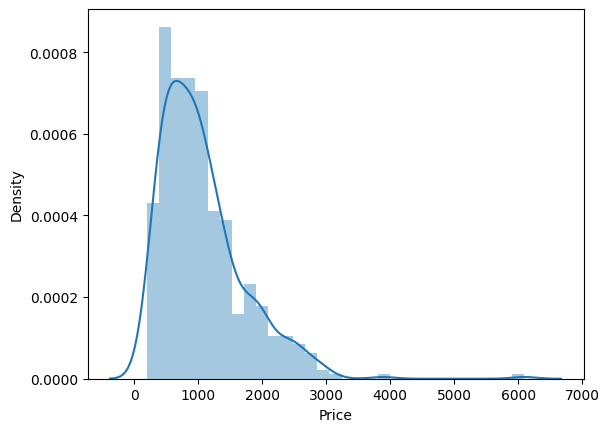

In [ ]:
# Analisis kolom price
sns.distplot(df['Price'])

Analisis : Berdasarkan hasil dapat dilihat ada banyak laptop dimana harganya lebih murah dan beberapa laptop harganya sangat tinggi. Dilihat dari density maka ini merupakan hal yang jelas dimana pembeli laptop dengan harga rendah/murah lebih banyak dibandingkan dengan harga tinggi.


<Axes: >

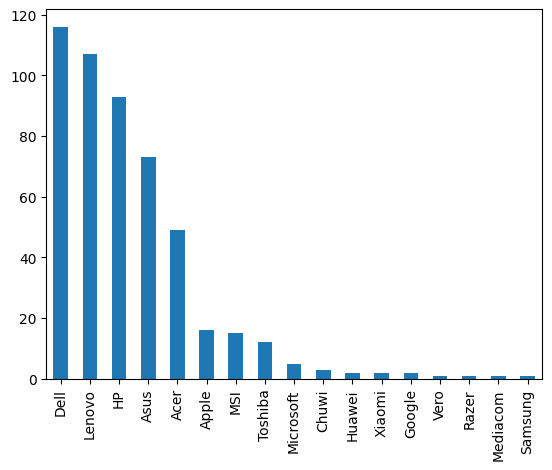

In [ ]:
# Company Analysis
df['Company'].value_counts().plot(kind='bar')

Analisis : Dell dan Lenovo memiliki jumlah laptop terbanyak. Lalu HP, Asus, Acer adalah jumlah laptop ke-2 tertinggi, merek lainnya memiliki jumlah laptop yang sangat sedikit.

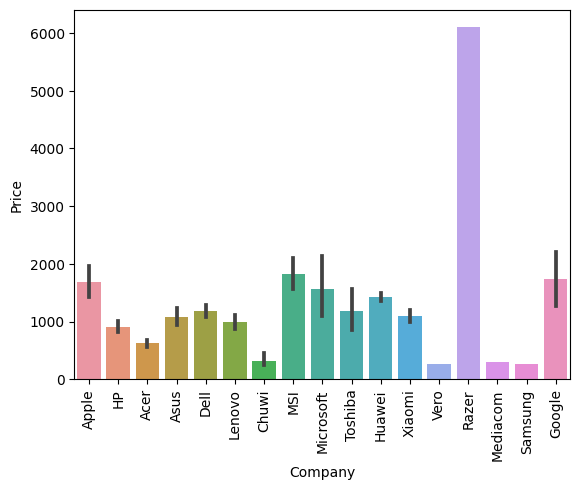

In [ ]:
# Averange price value of each brands
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Dari tiap Branding harga nya terlihat seberapa tinggi dan rendahnya berdasarkan tipe, merk company nya yang menjual

<Axes: >

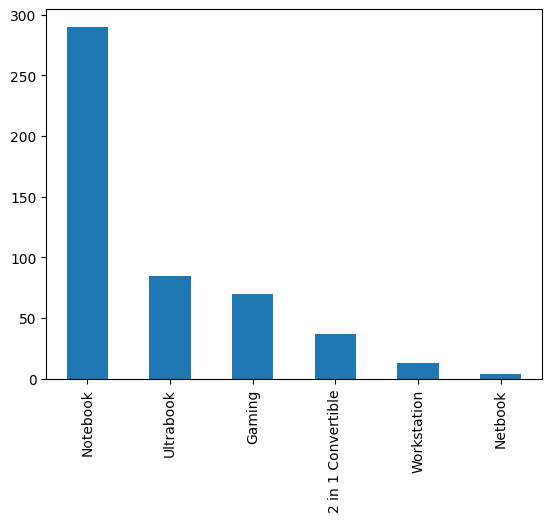

In [ ]:
# Typetime Analysis
df['TypeName'].value_counts().plot(kind='bar')

Analisis : Terdapat 250+ bertipe Notebook, 50+ laptop Ultrabook dan Gaming.
50- laptop 2 in 1 Convertible. Jumlah laptop yang tersedia sangat sedikit dari jenis Workstation dan Netbook yaitu di atas 10±.

-Workstation sangat mahal dibandingkan dengan laptop lain yang digunakan oleh para profesional.

-Netbook kebanyakan digunakan oleh anak-anak dan harganya juga murah.

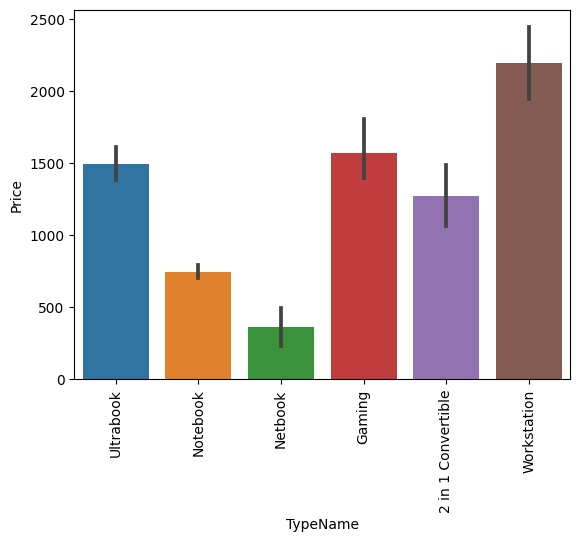

In [ ]:
# Averange values of each type of Laptops
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

Analisis : Laptop workstation sangat mahal, Laptop Gaming dan Ultrabook adalah laptop dengan harga tertinggi kedua, lalu Notebook dan Netbook harganya sangat terjangkau.

<ipython-input-27-51888cb550e6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

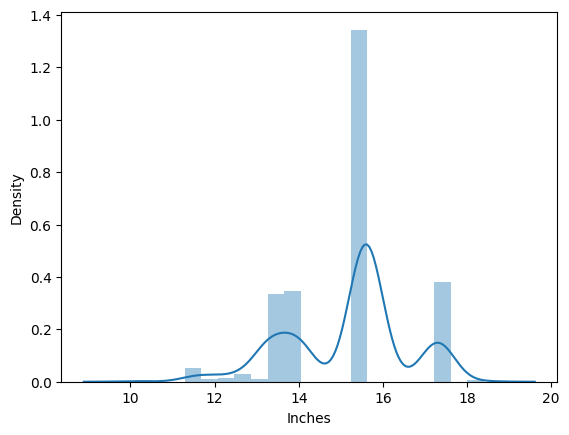

In [ ]:
sns.distplot(df['Inches'])

Analisis : Density tertinggi yaitu laptop berukuran 16 inci

<Axes: xlabel='Inches', ylabel='Price'>

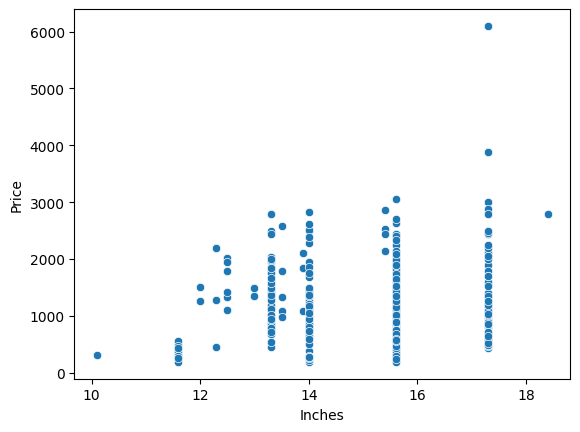

In [ ]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [ ]:
df.drop(columns=['Inches'],inplace=True)
df.head()

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


Analisis : Rata-rata 16, 18 inci harganya mahal

In [ ]:
# Analisis Korelasi
df.corr()

<ipython-input-30-7c19ecb3f5a4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Ram,Weight,Price
Ram,1.000000,0.194477,0.563934
Weight,0.194477,1.000000,0.123088
Price,0.563934,0.123088,1.000000


<ipython-input-31-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

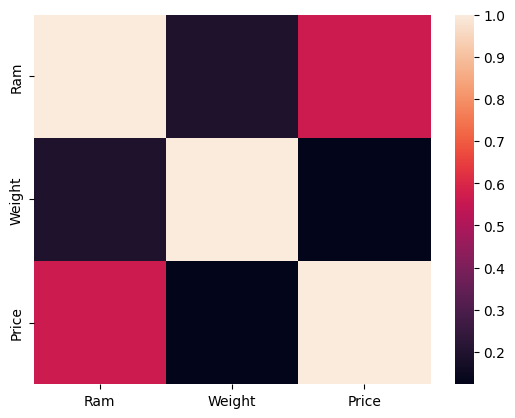

In [ ]:
sns.heatmap(df.corr())

**Spliting Data Menjadi Test dan Data Training**

In [ ]:
#Recall data kita
df.head()

,Company,Product,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [ ]:
#Pertama, buatlah variabel x dan y
x = df['Ram'].values.reshape(-1,1)
y = df['Price'].values.reshape(-1,1)

In [ ]:
#kedua, kita split data kita menjadi training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15)

In [ ]:
#Ketiga, kita bikin object linear regresi
lin_reg = LinearRegression()

In [ ]:
#Keempat, train the model menggunakan training data yang sudah displit
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Kelima, cari tau nilai slope/koefisien (m) dan intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[93.54517314]]
[163.66295078]


In [ ]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lin_reg.score(x_test, y_test)

-0.1445623563636962

Text(0.5, 1.0, 'Plot Ram vs Price')

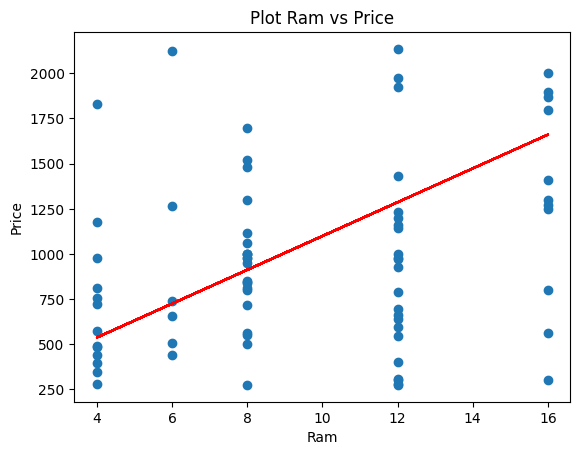

In [ ]:
#Ketujuh, visualisasi aktual vs prediksi menggunakan data testing
#Garis merah menggunakan garis regresi dari persamaan yang kita dapat tadi
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Ram')
plt.ylabel('Price')
plt.title('Plot Ram vs Price')

**Prediction**

In [ ]:
#Prediksi laptop dengan ram 2
lin_reg.predict([[2]])

array([[350.75329706]])

In [ ]:
#Prediksi laptop dengan ram 4
lin_reg.predict([[4]])

array([[537.84364333]])

In [ ]:
#Prediksi laptop dengan ram 6
lin_reg.predict([[6]])

array([[724.93398961]])

In [ ]:
#Prediksi laptop dengan ram 8
lin_reg.predict([[8]])

array([[912.02433588]])

In [ ]:
#Prediksi laptop dengan ram 12
lin_reg.predict([[12]])

array([[1286.20502844]])

In [ ]:
#Prediksi laptop dengan ram 16
lin_reg.predict([[16]])

array([[1660.38572099]])